<a href="https://colab.research.google.com/github/jjon215/MLHW_2/blob/master/Second_Arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 34s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 19s 482us/step - loss: 1.8922 - acc: 0.3143
Epoch 1/1
40000/40000 [==============================] - 13s 325us/step - loss: 1.6088 - acc: 0.4205
Epoch 1/1
40000/40000 [==============================] - 14s 350us/step - loss: 1.5181 - acc: 0.4522
Epoch 1/1
40000/40000 [==============================] - 12s 294us/step - loss: 1.4713 - acc: 0.4696
Epoch 1/1
40000/40000 [==============================] - 13s 337us/step - loss: 1.4313 - acc: 0.4860
Epoch 1/1
40000/40000 [==============================] - 12s 298us/step - loss: 1.3975 - acc: 0.4975
Epoch 1/1
40000/40000 [==============================] - 12s 304us/step - loss: 1.3696 - acc: 0.5068
Epoch 1/1
40000/40000 [=========

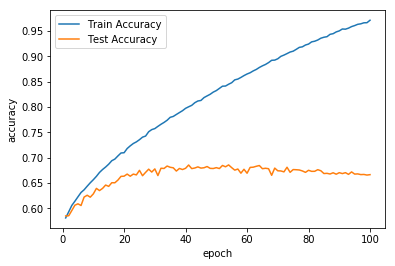

validation loss: 1.6917810311317445
validation accuracy: 0.6665


In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = list(x_train)
y_train = list(y_train)

val_loss = list()
val_acc = list()

x_val = np.array(x_train[4*10000:(4+1)*10000])
y_val = np.array(y_train[4*10000:(4+1)*10000])
  
x_tra = np.array(x_train[0:4*10000]+x_train[(4+1)*10000:50000])
y_tra = np.array(y_train[0:4*10000]+y_train[(4+1)*10000:50000])
  
model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_tra.shape[1:]))
model.add(AveragePooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))
   
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_tra)

for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(x_tra, y_tra, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

History = model.fit(x_tra, y_tra,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])
